<a href="https://colab.research.google.com/github/Roseyshi/Customer-Churn/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('/content/dataset (1).csv')
data.head()

,order_id,customer_number,transaction_date,description,total_qty,net_total,loyalty_amount,loyalty_points,discount_amount,customer_group,territory,delivery_date,delivery_window_end_time,delivery_window_start_time,set_warehouse,duka_latitude,duka_longitude
0,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Steam Energy Energy Drink 400ML CARTON (1.0 Item),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155
1,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Sumo Candles 8PC CARTON (12.0 Outers),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155
2,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Rhino Matches Kubwa 10 Boxes OUTER (1.0 Item),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155
3,4da580db-3b2c-4dff-a181-9c1341e05ea5,ID_172101,12/03/2022,Dawn Tissue Rolls Smart 40PC BALE (1.0 Bale),5,3637.91,0,0,38.53,Individual,Meru,14/03/2022,14:00:00,08:00:00,Meru Main - KDKE,0.036784,37.654155
4,4da580db-3b2c-4dff-a181-9c1341e05ea5,ID_172101,12/03/2022,Sawa Bath Soap 125G White DOZEN (1.0 Dzn),5,3637.91,0,0,38.53,Individual,Meru,14/03/2022,14:00:00,08:00:00,Meru Main - KDKE,0.036784,37.654155


In [6]:
data.isnull().sum()

,0
order_id,0
customer_number,0
transaction_date,0
description,0
total_qty,0
net_total,0
loyalty_amount,0
loyalty_points,0
discount_amount,0
customer_group,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43718 entries, 0 to 43717
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    43718 non-null  object 
 1   customer_number             43718 non-null  object 
 2   transaction_date            43718 non-null  object 
 3   description                 43718 non-null  object 
 4   total_qty                   43718 non-null  int64  
 5   net_total                   43718 non-null  float64
 6   loyalty_amount              43718 non-null  int64  
 7   loyalty_points              43718 non-null  int64  
 8   discount_amount             43718 non-null  float64
 9   customer_group              43718 non-null  object 
 10  territory                   43718 non-null  object 
 11  delivery_date               43718 non-null  object 
 12  delivery_window_end_time    43718 non-null  object 
 13  delivery_window_start_time  437

In [8]:
cat_data = ['customer_group', 'territory', 'set_warehouse', 'loyalty_amount', 'loyalty_points']
for i in cat_data:
  print(i)

  print(data[i].unique())

  print(data[i].nunique())

  print()

customer_group
['Individual' 'All Customer Groups']
2

territory
['Meru' 'Athi River' 'Nakuru' 'Thika Rd' 'Mtwapa Mombasa' 'Eastlands'
 'Kawangware' 'Majengo Mombasa' 'Ruiru' 'Ruai' 'Voi' 'Kiambu' 'Eldoret'
 'Embu' 'Juja' 'Ongata Rongai' 'Kisumu1' 'Kisii' 'Karatina']
19

set_warehouse
['Meru Main - KDKE' 'Athi River Main - KDKE' 'Nakuru Main - KDKE'
 'Thika Rd Main - KDKE' 'Mtwapa Mombasa Main - KDKE'
 'Eastlands Main - KDKE' 'Kawangware Main - KDKE'
 'Majengo Mombasa Main - KDKE' 'Ruiru Main - KDKE' 'Ruai Main - KDKE'
 'Voi Main - KDKE' 'Kiambu Main - KDKE' 'Eldoret Main - KDKE'
 'Embu Main - KDKE' 'Juja Main - KDKE' 'Ongata Rongai Main - KDKE'
 'Kisumu 1 Main - KDKE' 'Kisii Main - KDKE' 'Karatina Main - KDKE']
19

loyalty_amount
[0]
1

loyalty_points
[0]
1



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Feature Engineering (Example)
data['transaction_count'] = data.groupby('customer_number')['order_id'].transform('count')
data['total_spend'] = data.groupby('customer_number')['net_total'].transform('sum')
data['discount_spend'] = data.groupby('customer_number')['discount_amount'].transform('sum')
data['order_quantity'] = data.groupby('customer_number')['total_qty'].transform('sum')
data['delivery_wait_time'] = (pd.to_datetime(data['delivery_date']) - pd.to_datetime(data['transaction_date'])).dt.days
data['avg_order_value'] = data['total_spend'] / data['transaction_count']

<ipython-input-9-941bd36410a4>:10: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['delivery_wait_time'] = (pd.to_datetime(data['delivery_date']) - pd.to_datetime(data['transaction_date'])).dt.days
<ipython-input-9-941bd36410a4>:10: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['delivery_wait_time'] = (pd.to_datetime(data['delivery_date']) - pd.to_datetime(data['transaction_date'])).dt.days


In [10]:
data.head()

,order_id,customer_number,transaction_date,description,total_qty,net_total,loyalty_amount,loyalty_points,discount_amount,customer_group,...,delivery_window_start_time,set_warehouse,duka_latitude,duka_longitude,transaction_count,total_spend,discount_spend,order_quantity,delivery_wait_time,avg_order_value
0,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Steam Energy Energy Drink 400ML CARTON (1.0 Item),6,2231.57,0,0,66.38,Individual,...,13:00:00,Meru Main - KDKE,0.036784,37.654155,11,51483.71,825.66,58,1,4680.337273
1,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Sumo Candles 8PC CARTON (12.0 Outers),6,2231.57,0,0,66.38,Individual,...,13:00:00,Meru Main - KDKE,0.036784,37.654155,11,51483.71,825.66,58,1,4680.337273
2,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Rhino Matches Kubwa 10 Boxes OUTER (1.0 Item),6,2231.57,0,0,66.38,Individual,...,13:00:00,Meru Main - KDKE,0.036784,37.654155,11,51483.71,825.66,58,1,4680.337273
3,4da580db-3b2c-4dff-a181-9c1341e05ea5,ID_172101,12/03/2022,Dawn Tissue Rolls Smart 40PC BALE (1.0 Bale),5,3637.91,0,0,38.53,Individual,...,08:00:00,Meru Main - KDKE,0.036784,37.654155,11,51483.71,825.66,58,2,4680.337273
4,4da580db-3b2c-4dff-a181-9c1341e05ea5,ID_172101,12/03/2022,Sawa Bath Soap 125G White DOZEN (1.0 Dzn),5,3637.91,0,0,38.53,Individual,...,08:00:00,Meru Main - KDKE,0.036784,37.654155,11,51483.71,825.66,58,2,4680.337273


In [11]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43718 entries, 0 to 43717
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    43718 non-null  object 
 1   customer_number             43718 non-null  object 
 2   transaction_date            43718 non-null  object 
 3   description                 43718 non-null  object 
 4   total_qty                   43718 non-null  int64  
 5   net_total                   43718 non-null  float64
 6   loyalty_amount              43718 non-null  int64  
 7   loyalty_points              43718 non-null  int64  
 8   discount_amount             43718 non-null  float64
 9   customer_group              43718 non-null  object 
 10  territory                   43718 non-null  object 
 11  delivery_date               43718 non-null  object 
 12  delivery_window_end_time    43718 non-null  object 
 13  delivery_window_start_time  437

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_qty,43718.000000,6.603367,13.364121,1.000000,2.000000,4.000000,7.000000,500.000000
net_total,43718.000000,10464.409966,30233.640020,181.030000,2556.317500,4864.660000,9484.540000,1379599.140000
loyalty_amount,43718.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
loyalty_points,43718.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
discount_amount,43718.000000,178.727343,496.646786,0.000000,35.600000,72.700000,155.250000,20231.250000
duka_latitude,43718.000000,-1.218860,1.066350,-4.289833,-1.314316,-1.218128,-0.628575,0.885170
duka_longitude,43718.000000,36.898733,1.130535,34.455751,36.715435,36.905558,37.023091,40.121896
transaction_count,43718.000000,30.577199,25.036299,1.000000,13.000000,24.000000,41.000000,159.000000
total_spend,43718.000000,366790.469779,1037007.657844,181.030000,58643.910000,146781.740000,375257.380000,20122012.020000
discount_spend,43718.000000,6138.651240,14816.250666,0.000000,930.740000,2371.060000,5847.280000,233309.820000


<Figure size 2400x1800 with 0 Axes>

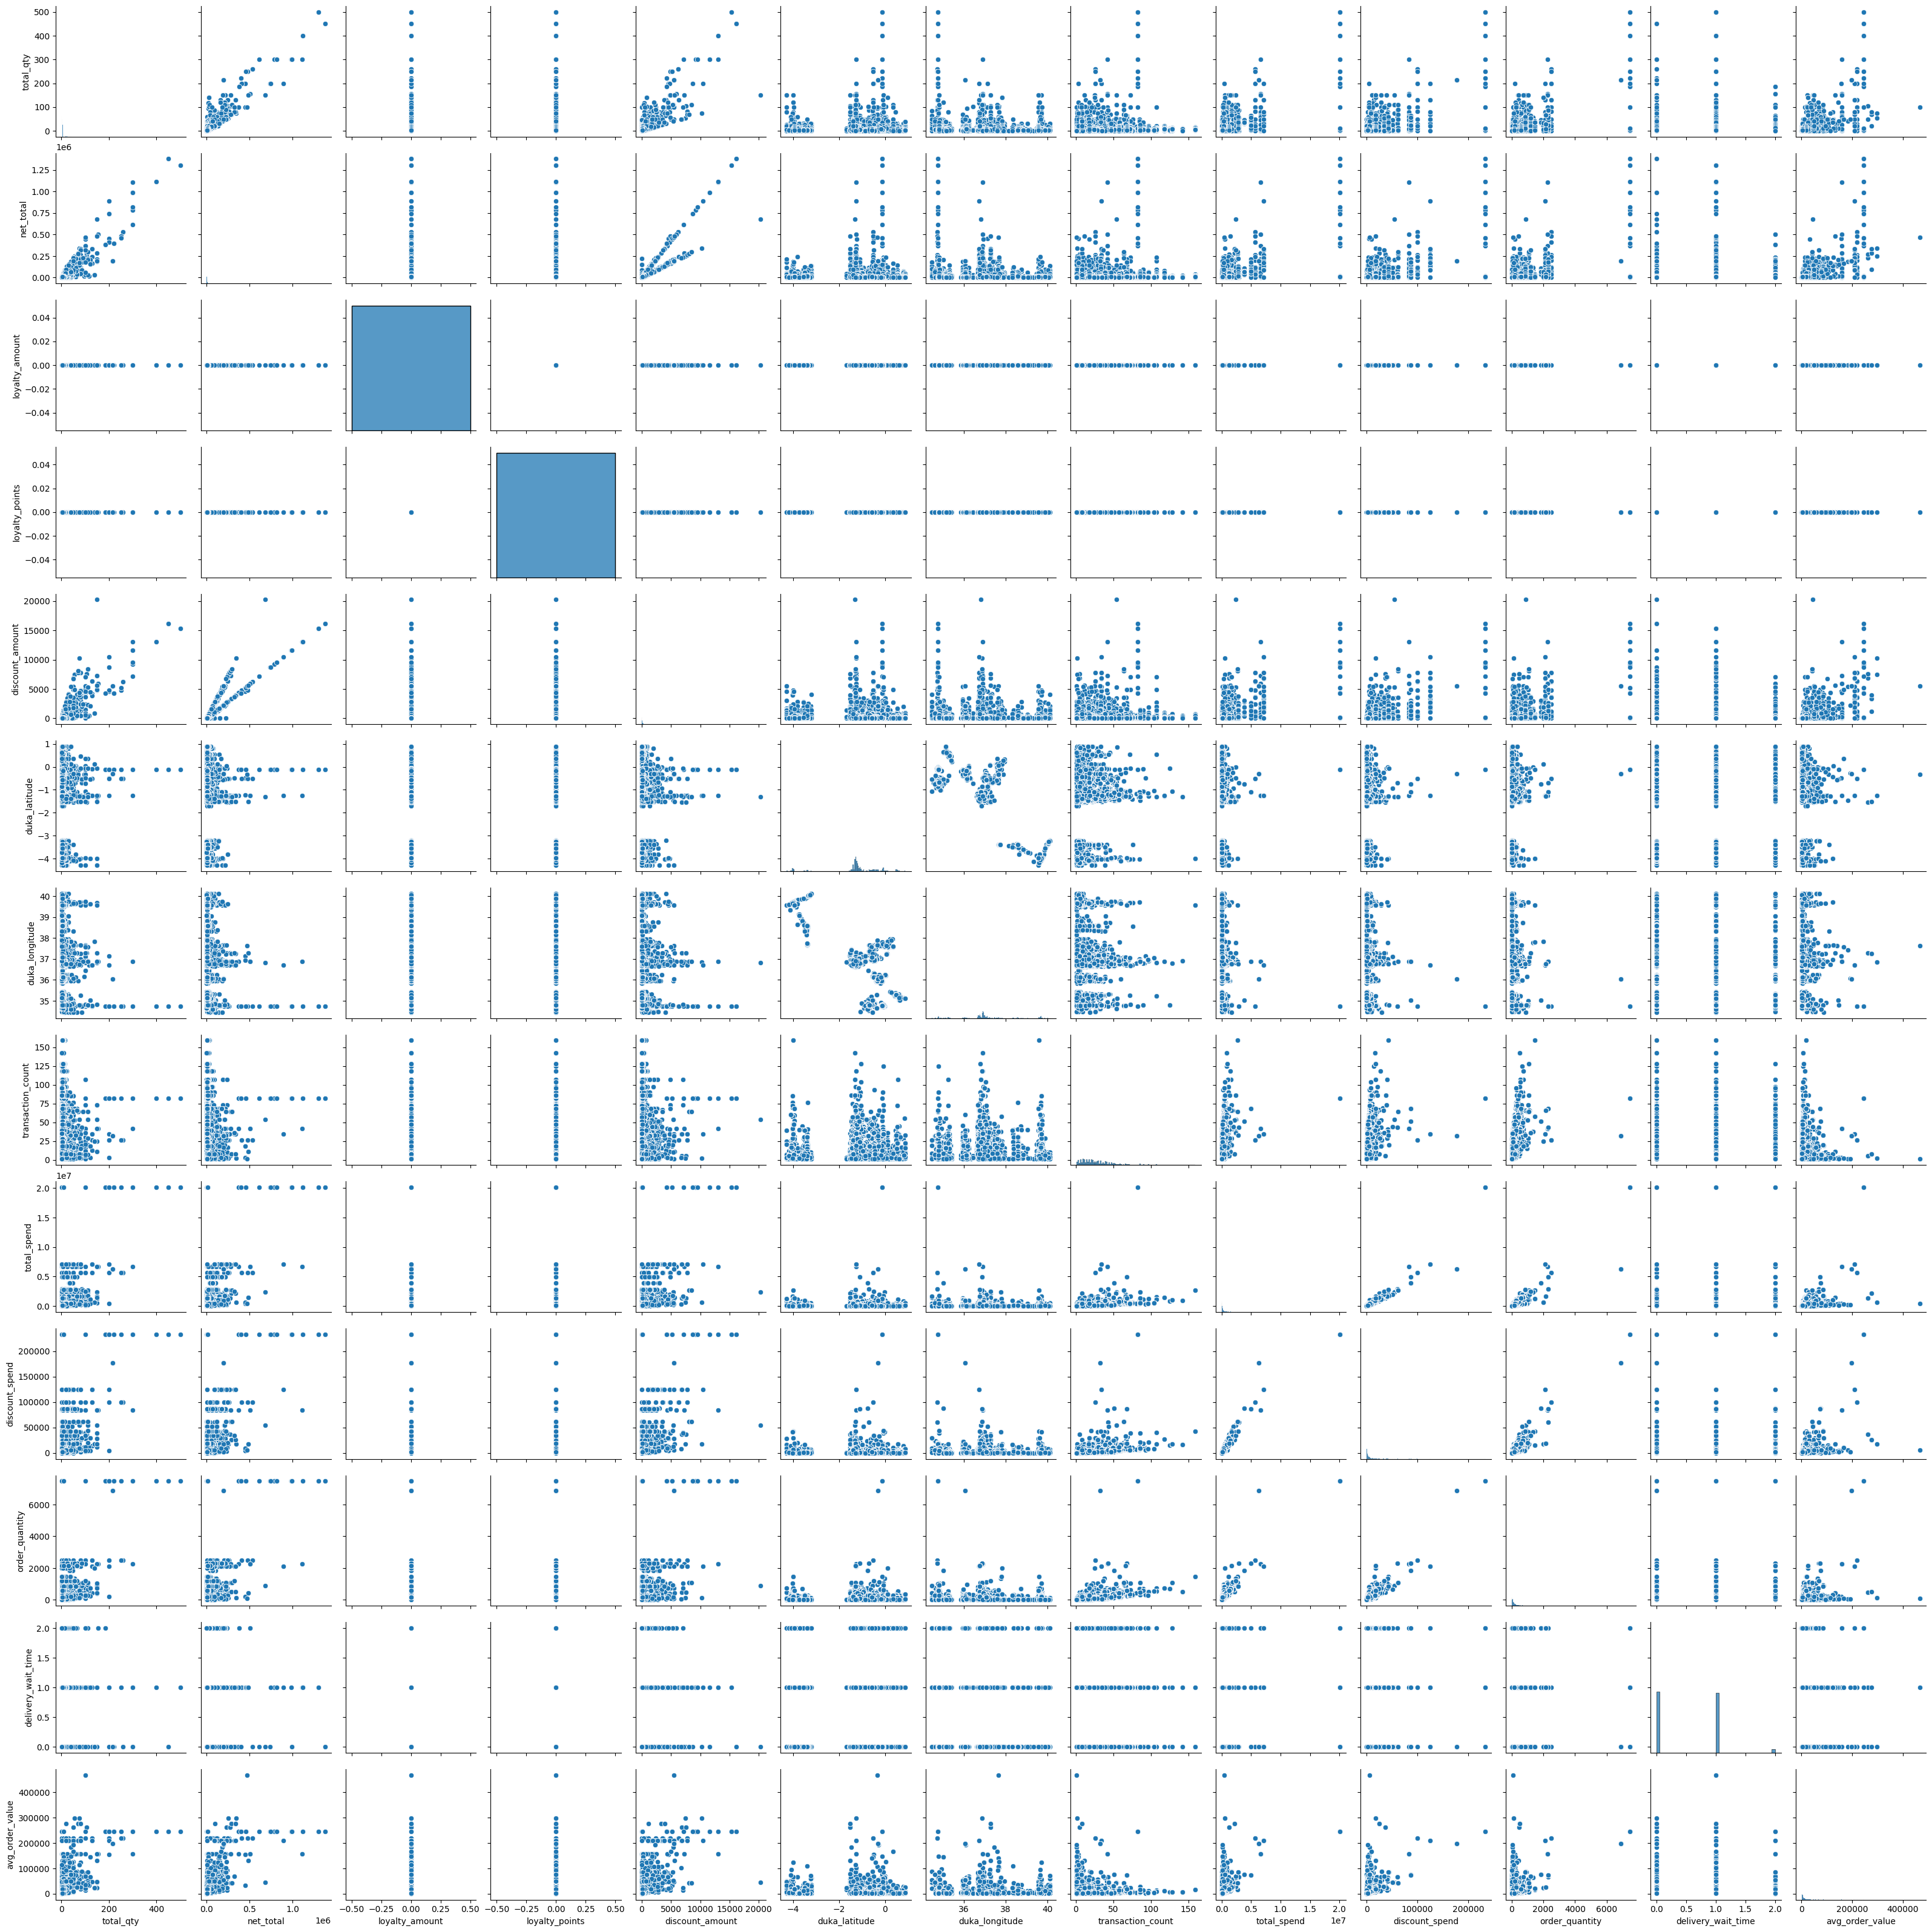

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (24,18))
sns.pairplot(data)
plt.show()

<ipython-input-17-47b4f6e75ebf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(thresholds[col])


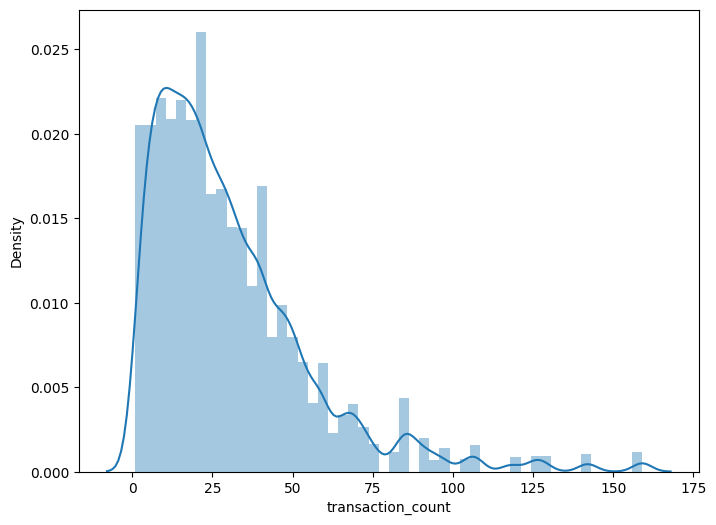

<ipython-input-17-47b4f6e75ebf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(thresholds[col])


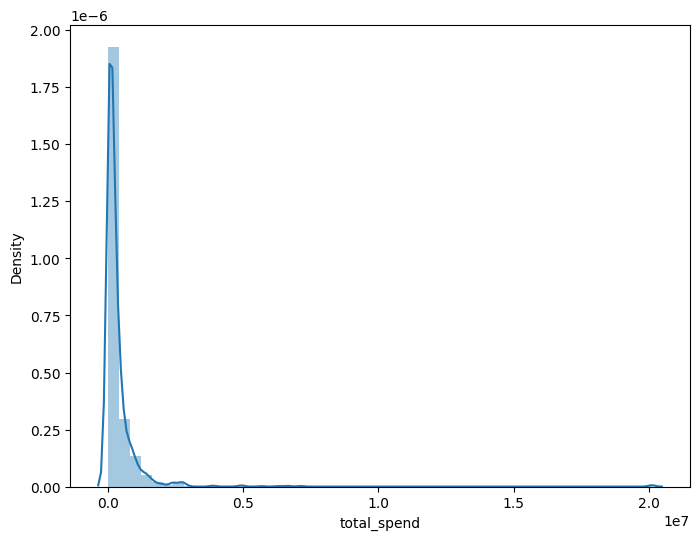

<ipython-input-17-47b4f6e75ebf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(thresholds[col])


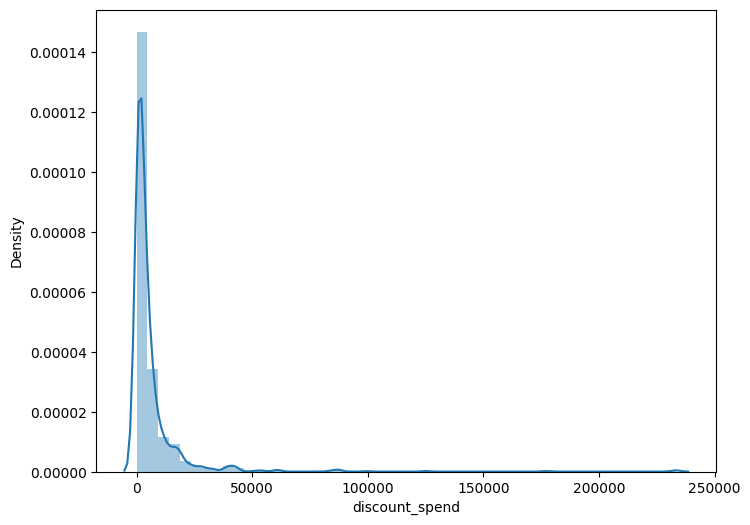

<ipython-input-17-47b4f6e75ebf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(thresholds[col])


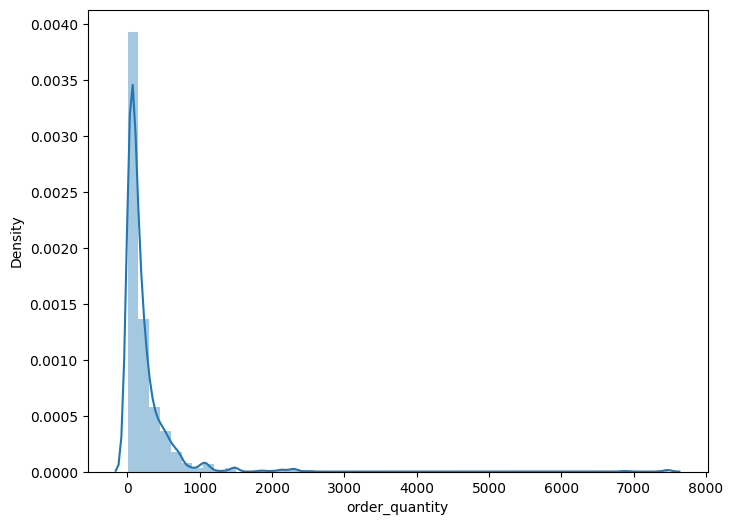

<ipython-input-17-47b4f6e75ebf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(thresholds[col])


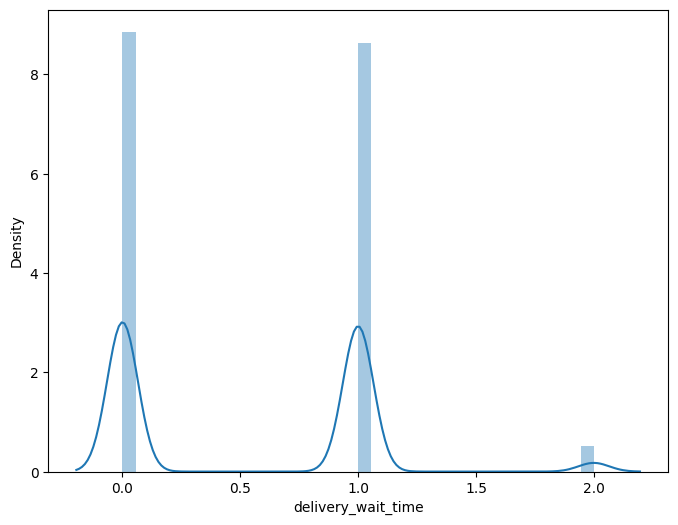

In [17]:
thresholds = data[['transaction_count', 'total_spend', 'discount_spend', 'order_quantity', 'delivery_wait_time']]
for col in thresholds.columns:
  plt.figure(figsize = (8,6))
  sns.distplot(thresholds[col])
  plt.show()

In [18]:
data['delivery_wait_time'].value_counts()

,count
delivery_wait_time,
0,21521
1,20946
2,1251


In [19]:
thresholds = data[['transaction_count', 'total_spend', 'discount_spend', 'order_quantity', 'delivery_wait_time']]
for col in thresholds.columns:
  percentile_25 = data[col].quantile(0.25)
  percentile_50 = data[col].quantile(0.50)
  percentile_75 = data[col].quantile(0.75)

  print(col)
  print(f"25th Percentile: {percentile_25}")
  print(f"50th Percentile (Median): {percentile_50}")
  print(f"75th Percentile: {percentile_75}")
  print()

transaction_count
25th Percentile: 13.0
50th Percentile (Median): 24.0
75th Percentile: 41.0

total_spend
25th Percentile: 58643.909999999996
50th Percentile (Median): 146781.74
75th Percentile: 375257.38

discount_spend
25th Percentile: 930.74
50th Percentile (Median): 2371.06
75th Percentile: 5847.280000000001

order_quantity
25th Percentile: 50.0
50th Percentile (Median): 114.0
75th Percentile: 254.0

delivery_wait_time
25th Percentile: 0.0
50th Percentile (Median): 1.0
75th Percentile: 1.0



In [20]:
# Label Creation
data['churn'] = 0  # Default to no churn
data.loc[
    (data['transaction_count'] < 24) &
    (data['total_spend'] < 146781.74) &
    (data['discount_spend'] < 2371.06) &
    (data['order_quantity'] < 114.0) &
    (data['delivery_wait_time'] > 1),
    'churn'
] = 1

# Drop duplicates to get one row per customer
df_churn = data.drop_duplicates(subset=['customer_number'])

In [21]:
df_churn.head()

,order_id,customer_number,transaction_date,description,total_qty,net_total,loyalty_amount,loyalty_points,discount_amount,customer_group,...,set_warehouse,duka_latitude,duka_longitude,transaction_count,total_spend,discount_spend,order_quantity,delivery_wait_time,avg_order_value,churn
0,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Steam Energy Energy Drink 400ML CARTON (1.0 Item),6,2231.570000,0,0,66.380000,Individual,...,Meru Main - KDKE,0.036784,37.654155,11,51483.710000,825.660000,58,1,4680.337273,0
11,768b3ba5-53b2-42fd-b219-abba7f7e1014,ID_007289,28/02/2022,Postman Cooking Oil 10L JERICAN (1.0 PC),30,58119.830000,0,0,681.000000,Individual,...,Athi River Main - KDKE,-1.518684,37.267866,1,58119.830000,681.000000,30,0,58119.830000,0
12,7489068b-672a-46c5-b06e-c9766ef1e821,ID_063088,23/03/2022,Jamaa Bar Soap Cream 800G CARTON (12.0 PC),2,2223.160000,0,0,66.130000,Individual,...,Nakuru Main - KDKE,-0.271481,36.101636,6,8714.460000,259.220000,12,1,1452.410000,0
18,cc471af6-2080-4897-b60d-a40bcbea8e19,ID_196874,08/03/2022,Menengai Bar Soap Cream 800G CARTON (25.0 PC),1,3029.740000,0,0,35.500000,Individual,...,Thika Rd Main - KDKE,-1.241158,36.896701,4,14555.560000,170.550000,4,1,3638.890000,0
22,c7387e95-8d85-4b67-a964-adb054a8e51e,ID_140563,18/02/2022,Local White Sugar 50KG BAG (1.0 Item),1,5035.340000,0,0,59.000000,Individual,...,Mtwapa Mombasa Main - KDKE,-4.007936,39.690049,2,30241.930000,354.350000,16,0,15120.965000,0


In [22]:
df_churn.isnull().sum()

,0
order_id,0
customer_number,0
transaction_date,0
description,0
total_qty,0
net_total,0
loyalty_amount,0
loyalty_points,0
discount_amount,0
customer_group,0


In [23]:
# Select features and target
X = df_churn[['transaction_count', 'total_spend', 'discount_spend', 'order_quantity', 'delivery_wait_time']]
y = df_churn['churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       981
           1       0.94      0.85      0.89        39

    accuracy                           0.99      1020
   macro avg       0.97      0.92      0.94      1020
weighted avg       0.99      0.99      0.99      1020



In [24]:
df_churn['churn'].value_counts()

,count
churn,
0,3266
1,131


In [25]:
result_df = pd.DataFrame({
    'customer_number': df_churn.loc[X_test.index, 'customer_number'],
    'predicted_churn': y_pred
})

# Save the results to a CSV file
result_df.to_csv('customer_churn_predictions.csv', index=False)

print("CSV file 'customer_churn_predictions.csv' created successfully.")

CSV file 'customer_churn_predictions.csv' created successfully.
